In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
# Dados
raw_data = pd.read_csv("2.01. Admittance.csv")
data = raw_data.copy()
data["Admitted"] = data["Admitted"].map({"Yes":1, "No":0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


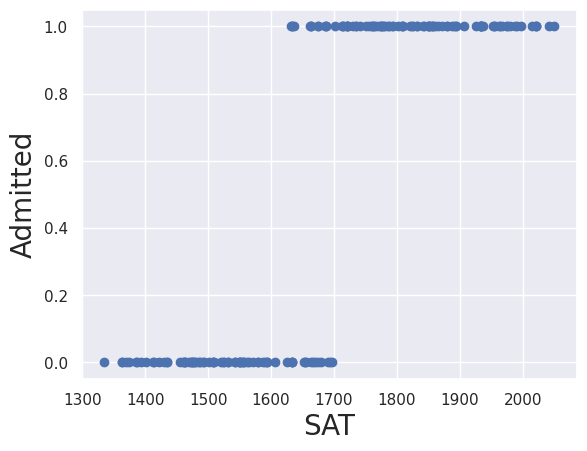

In [6]:
# Declaração as Variáveis Dependentes e Independentes
y = data["Admitted"]
x1 = data["SAT"]
plt.scatter(x1,y)
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


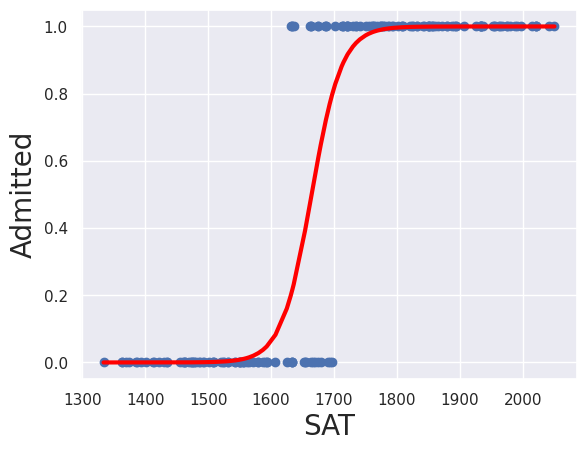

In [9]:
# Modelo de Regressão Logística (utilizando statsmodels)
x = sm.add_constant(x1)
results = sm.Logit(y,x).fit()
results.summary()

yhat = np.exp(results.params[0] + results.params[1]*x1) / (1 +np.exp(results.params[0] + results.params[1]*x1))
f_sorted = np.sort(yhat)
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
fig = plt.plot(x_sorted,f_sorted, lw=3, c="red", label="Regressão Logística")
plt.show()